## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

## *Load Dataset*

In [3]:
df = pd.read_csv("C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/data/weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## **EDA**

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
sns.set_style(style = "whitegrid")

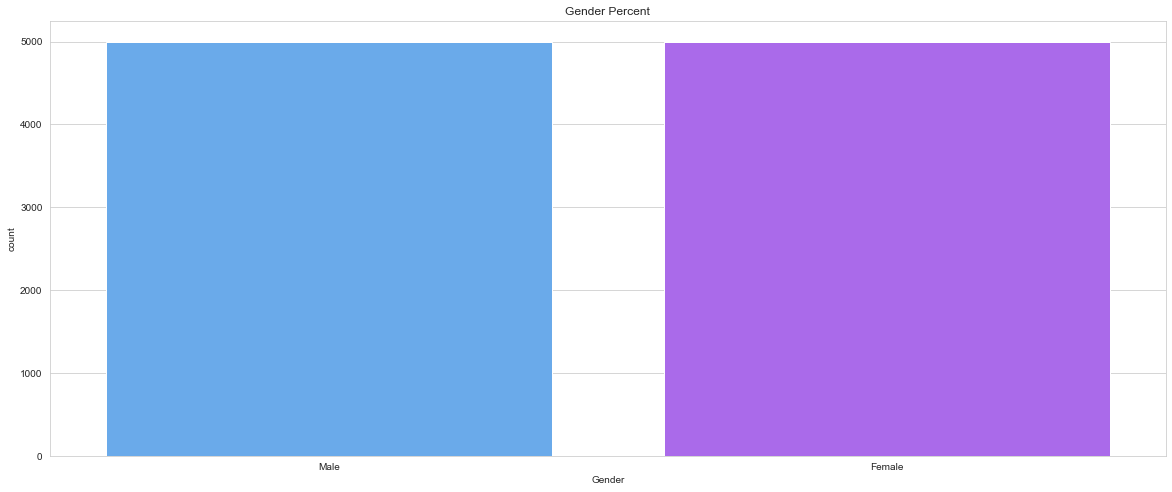

In [7]:
fig,ax = plt.subplots(1,1,figsize = (20,8))
ax.set_title("Gender Percent")
_ = sns.countplot(data = df, x = "Gender",palette="cool")

The two kinds of sexes are perfectly balanced.

### *Physical Qualities According to Gender*

In [8]:
def mean_serie(feature):
    return df.groupby("Gender")[feature].mean().sort_values(ascending = True)

In [9]:
serie_height = mean_serie('Height')
serie_weight = mean_serie('Weight')

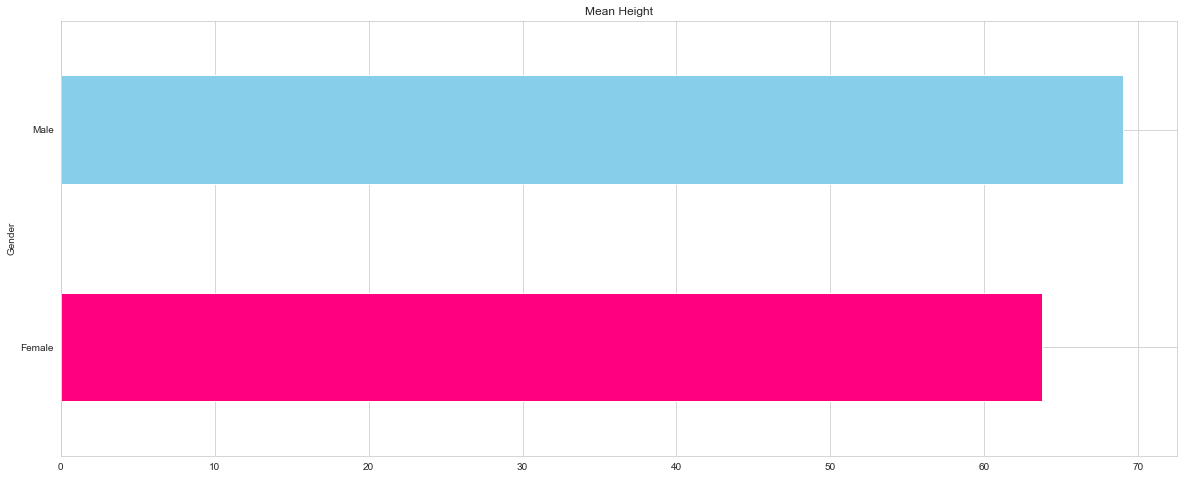

In [12]:
_ = serie_height.plot(kind = "barh",color = ['#ff0080','#87CEEB'],title = "Mean Height",figsize = (20,8))
plt.savefig("C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/img/mean_height")

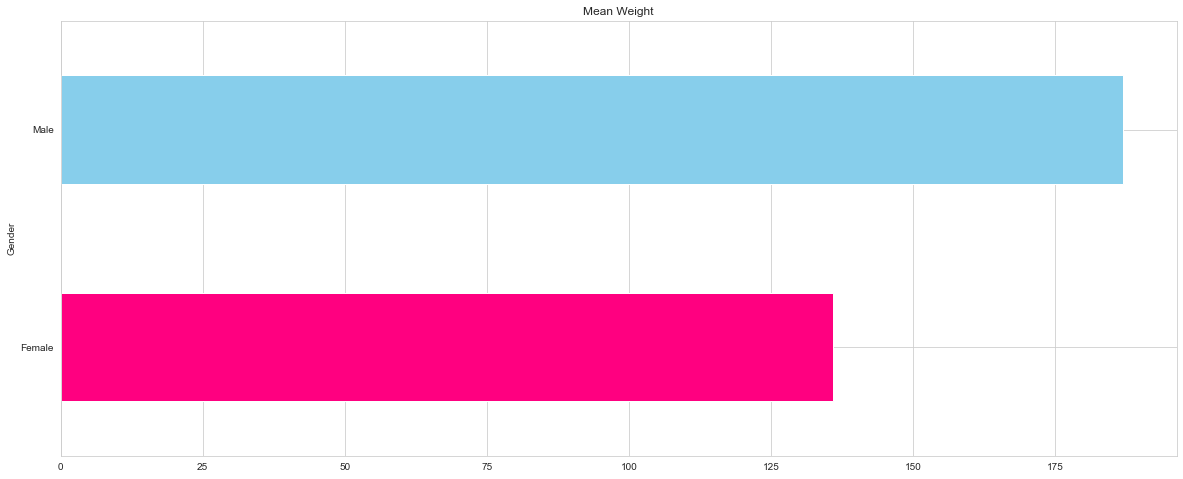

In [13]:
_ = serie_weight.plot(kind = "barh",color = ['#ff0080','#87CEEB'],title = "Mean Weight",figsize = (20,8))
plt.savefig("C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/img/mean_weight")

In both biological physical qualities, men have greater qualities, since they are totally different at the hormonal level, for example, men produce more testosterone, which will generate that we have more strength and resistance.

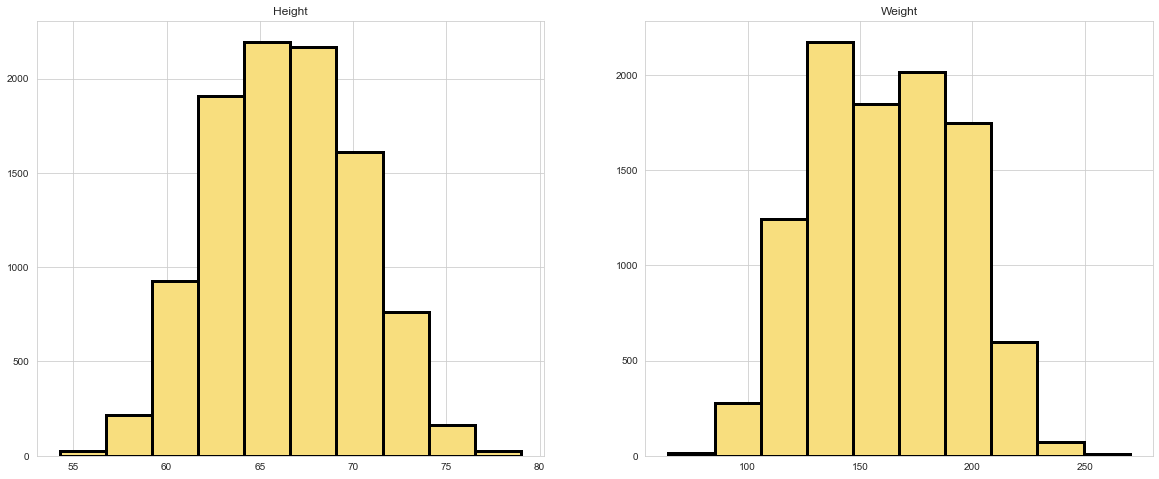

In [40]:
fig,(ax,ax1) = plt.subplots(1,2,figsize = (20,8))

ax.set_title("Height")
ax.hist(df['Height'],ec = "k",color = '#F8DE7E',lw = 3)

ax1.set_title("Weight")
ax1.hist(df['Weight'],ec = "k",color = '#F8DE7E',lw = 3)
plt.savefig("C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/img/histogram_matrix")
plt.show()

The two continuous variables are within a normal distribution, so the interquartile method can be applied in the conventional way.

## **Feature Enginiering**

In [15]:
def Upper_limit(x):
    
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    IQR = q3 - q1
    
    return q3 + 1.5 * IQR


def Lower_limit(x):
    
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    IQR = q3 - q1
    
    return q1 - 1.5 * IQR

Create two functions that allow me to calculate the lower and upper interval, we will use a pandas **apply()** method to use custom functions.

In [16]:
male = df.query("Gender == 'Male'")
female = df.query("Gender == 'Female'")

#### *Height*

In [17]:
df.groupby('Gender')['Height'].apply(Lower_limit).sort_values(ascending = True)

Gender
Female    56.390756
Male      61.453582
Name: Height, dtype: float64

In [19]:
df.groupby('Gender')['Height'].apply(Upper_limit).sort_values(ascending = True)

Gender
Female    71.067251
Male      76.709840
Name: Height, dtype: float64

In [20]:
male = male.query('Height > 61.45 and Height < 76.70')
female = female.query('Height > 56.39 and Height < 71.06')

#### *Weight*

In [22]:
df.groupby('Gender')['Weight'].apply(Lower_limit).sort_values(ascending = True)

Gender
Female     84.118851
Male      134.182716
Name: Weight, dtype: float64

In [21]:
df.groupby('Gender')['Weight'].apply(Upper_limit).sort_values(ascending = True)

Gender
Female    187.626171
Male      240.062854
Name: Weight, dtype: float64

In [23]:
male = male.query('Weight > 134.18 and Weight < 240.06')
female = female.query('Weight > 84.11 and Weight < 187.62')

In [24]:
df_clear = pd.concat([male,female])

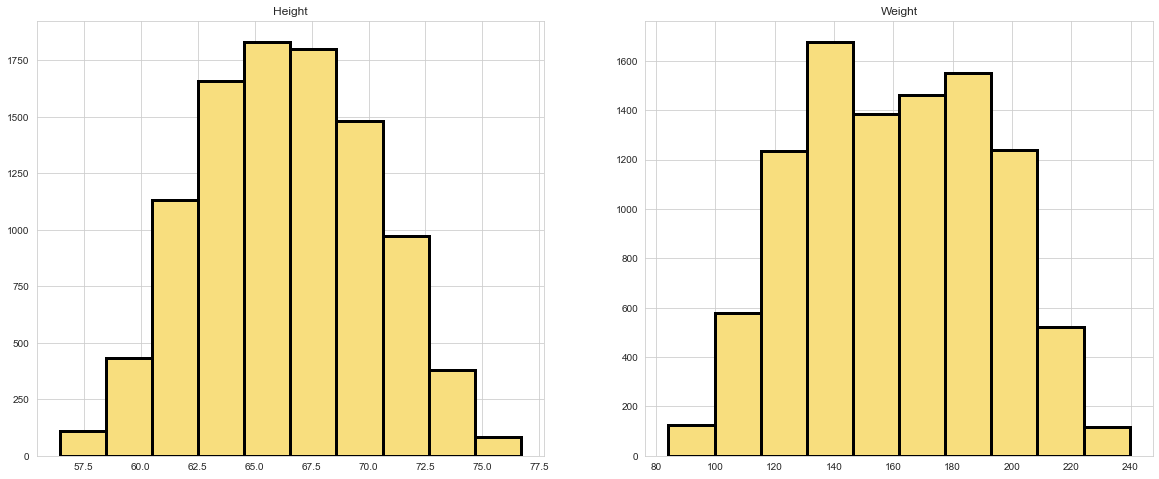

In [41]:
fig,(ax,ax1) = plt.subplots(1,2,figsize = (20,8))

ax.set_title("Height")
ax.hist(df_clear['Height'],ec = "k",color = '#F8DE7E',lw = 3)

ax1.set_title("Weight")
ax1.hist(df_clear['Weight'],ec = "k",color = '#F8DE7E',lw = 3)
plt.savefig("C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/img/feature_eng")
plt.show()

## *Data Transform*

In [54]:
df_clear['Gender'] = np.where(df_clear['Gender'] == 'Male',1,0)

## *Split Data*

In [55]:
from sklearn.model_selection import train_test_split

In [62]:
def load_inputs_outputs():
    
    X = df_clear.drop(columns=['Weight'])
    y = df_clear.Weight
    
    return X,y

In [63]:
X,y = load_inputs_outputs()

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

### *Array Transform*

In [65]:
def array(x):
    return np.asarray(x)

In [66]:
X_train,X_test = array(X_train),array(X_test)
Y_train,Y_test = array(Y_train),array(Y_test)

## *Model*

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm = LinearRegression(normalize=True)

In [70]:
lm.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [71]:
lm.score(X_test,Y_test)

0.9028878715601477

In [72]:
lm.score(X_train,Y_train)

0.9011390934718047

It has a robust adjusted R for both the training and validation data.

## *Mean Squared Error*

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [75]:
mse_train = mean_squared_error(Y_train,pred_train)
mse_test = mean_squared_error(Y_test,pred_test)

In [78]:
print(f"MSE Train: {mse_train}")
print(f"MSE Test:  {mse_test}")

MSE Train: 98.27269765370367
MSE Test:  100.0900771198522


The model offers quite similar MSE, they are comparable to each other, which means that the model can perfectly generalize.

## *Cross Validation*

In [79]:
from sklearn.model_selection import cross_val_score

In [81]:
cv = cross_val_score(lm,X_test,Y_test,cv = 5)

In [82]:
cv

array([0.89864249, 0.91072833, 0.90926885, 0.90489388, 0.89093646])

In [83]:
cv.mean()

0.9028940008099984

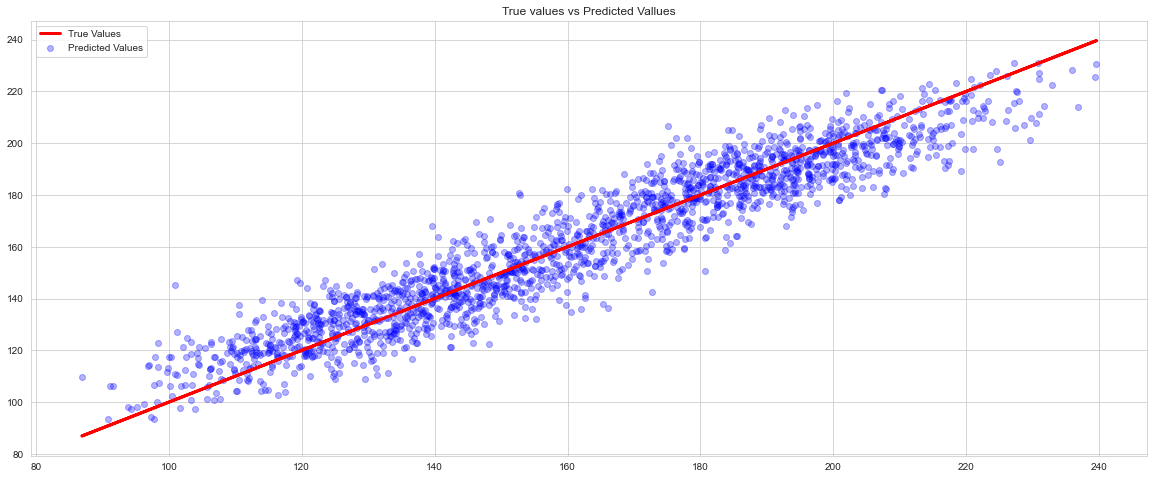

In [98]:
fig = plt.subplots(1,1,figsize = (20,8))
plt.title("True values vs Predicted Vallues")
_ = plt.scatter(Y_test,pred_test,alpha = 0.3,color = "blue",label = "Predicted Values")
_ = plt.plot(Y_test,Y_test,lw = 3,c = "red",label = "True Values")
plt.legend()
plt.savefig("C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/img/model")
plt.show()

In [99]:
predictions = pd.DataFrame({'True Values':Y_test,'Predicted Values':pred_test})

In [101]:
predictions.sample(n = 10)

,True Values,Predicted Values
1563,134.750594,135.062040
1342,128.029572,122.409076
1541,171.386659,169.607936
246,116.468154,115.702171
285,175.436511,178.489138
4,112.915209,121.220684
1771,164.928049,153.692433
1666,98.331546,122.958710
15,148.605735,157.895421
748,200.232021,191.543133


Most predictions are very close to the original value.

## *Save Model*

In [102]:
import joblib

In [104]:
joblib.dump(lm,"C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/app/model.pkl")

['C:/Users/PC/Desktop/Ciencias de datos/Blog/04-Heroku/app/model.pkl']